In [1]:
import sys
sys.path.append('/Users/pradap/Documents/Research/Python-Package/scaling/dmagellan/')
import pandas as pd

In [2]:
# imports
from dmagellan.blocker.attrequivalence.attr_equiv_blocker import AttrEquivalenceBlocker
from dmagellan.blocker.overlap.overlapblocker import OverlapBlocker
from dmagellan.blocker.blackbox.blackbox_blocker import BlackBoxBlocker
from dmagellan.blocker.rulebased.rule_based_blocker import RuleBasedBlocker
from dmagellan.feature.autofeaturegen import get_features_for_blocking
from dmagellan.feature.extractfeatures import extract_feature_vecs
from dmagellan.feature.autofeaturegen import get_features_for_matching
from dmagellan.matcher.dtmatcher import DTMatcher
from dmagellan.utils.py_utils.utils import concat_df
from dask import delayed
from dask.threaded import get
from distributed import Client
import py_entitymatching as em

/Users/pradap/miniconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
client = Client('127.0.0.1:8786')

In [4]:
orig_A = pd.read_csv('./data/citeseer_nonans.csv', usecols=['id', 'title'])
orig_B = pd.read_csv('./data/dblp_nonans.csv', usecols=['id', 'title'])

In [11]:
orig_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823846 entries, 0 to 1823845
Data columns (total 2 columns):
id       int64
title    object
dtypes: int64(1), object(1)
memory usage: 27.8+ MB


In [6]:
# sample datasets
A = pd.read_csv('./data/sample_citeseer.csv', usecols=['id', 'title'])
B = pd.read_csv('./data/sample_dblp.csv', usecols=['id', 'title'])

In [32]:
A1 = A.head(4)

In [49]:
K = orig_B.values

In [50]:
d = {}
for row in K:
    t = row[1].lower().split()
    for s in t:
        if s in d:
            d[s]+=1
        else:
            d[s] = 0

In [51]:
import operator

sorted_x = sorted(d.items(), key=operator.itemgetter(1))
sorted_x.reverse()

In [48]:
ob.stop_words

['a',
 'an',
 'and',
 'are',
 'as',
 'at',
 'be',
 'by',
 'for',
 'from',
 'has',
 'he',
 'in',
 'is',
 'it',
 'its',
 'on',
 'that',
 'the',
 'to',
 'of',
 'was',
 'were',
 'will',
 'with']

In [52]:
sorted_x[:50]

[('of', 975592),
 ('for', 819383),
 ('and', 659250),
 ('a', 648023),
 ('the', 551031),
 ('in', 538753),
 ('on', 311159),
 ('with', 239497),
 ('to', 202847),
 ('using', 196632),
 ('an', 180606),
 ('based', 134187),
 ('analysis', 91547),
 ('networks.', 82195),
 ('data', 80585),
 ('systems.', 80459),
 ('system', 78524),
 ('by', 75778),
 ('from', 74286),
 ('model', 73244),
 ('design', 68620),
 ('-', 66448),
 ('approach', 63305),
 ('information', 63117),
 ('algorithm', 62842),
 ('control', 61151),
 ('systems', 55877),
 ('network', 52696),
 ('learning', 51296),
 ('performance', 50940),
 ('wireless', 48509),
 ('distributed', 48177),
 ('new', 47971),
 ('method', 46473),
 ('mobile', 46196),
 ('image', 45045),
 ('dynamic', 44268),
 ('efficient', 43911),
 ('software', 43091),
 ('adaptive', 41194),
 ('detection', 39535),
 ('application', 38811),
 ('modeling', 37790),
 ('system.', 37288),
 ('web', 37116),
 ('networks', 36341),
 ('management', 35912),
 ('fuzzy', 35537),
 ('parallel', 35480),
 ('neur

In [34]:
for k in A1.values:
    print(k[1])

An Environment Supporting Software Process Standardization and Innovation Abstract
Title Systematic review
Concept Lattices as a Formal Method for the Integration of Geographic Ontologies
Kada 29


In [5]:
# blocking
ob = OverlapBlocker()
C = ob.block_tables(orig_A, orig_B, 'id', 'id', 'title', 'title', 
                    overlap_size=6, nltable_chunks=1, nrtable_chunks=1, 
                    scheduler=get, compute=False, 
                    rem_stop_words=True
                   )
# len(C)

In [11]:
client = Client('127.0.0.1:8786')

In [ ]:
D = C.compute(get=client.get, optimize_graph=False)

In [57]:
import sys

In [59]:
import cloudpickle as cp

In [73]:
c1 = cp.dumps(C)

In [74]:
sys.getsizeof(c1)/(1024.0*1024*1024)

0.3236828129738569

In [55]:
len(C)

13

In [7]:
# client.restart()

In [14]:
L = pd.read_csv('./data/sample_labeled_data.csv')

In [15]:
F = em.get_features_for_matching(A, B)

In [16]:
F

,feature_name,left_attribute,right_attribute,left_attr_tokenizer,right_attr_tokenizer,simfunction,function,function_source,is_auto_generated
0,id_id_exm,id,id,None,None,exact_match,<function id_id_exm at 0x119453c80>,from py_entitymatching.feature.simfunctions import *\nfrom py_entitymatching.feature.tokenizers ...,True
1,id_id_anm,id,id,None,None,abs_norm,<function id_id_anm at 0x11c594410>,from py_entitymatching.feature.simfunctions import *\nfrom py_entitymatching.feature.tokenizers ...,True
2,id_id_lev_dist,id,id,None,None,lev_dist,<function id_id_lev_dist at 0x11c594500>,from py_entitymatching.feature.simfunctions import *\nfrom py_entitymatching.feature.tokenizers ...,True
3,id_id_lev_sim,id,id,None,None,lev_sim,<function id_id_lev_sim at 0x141aa6578>,from py_entitymatching.feature.simfunctions import *\nfrom py_entitymatching.feature.tokenizers ...,True
4,title_title_jac_qgm_3_qgm_3,title,title,qgm_3,qgm_3,jaccard,<function title_title_jac_qgm_3_qgm_3 at 0x141aa6d70>,from py_entitymatching.feature.simfunctions import *\nfrom py_entitymatching.feature.tokenizers ...,True
5,title_title_cos_dlm_dc0_dlm_dc0,title,title,dlm_dc0,dlm_dc0,cosine,<function title_title_cos_dlm_dc0_dlm_dc0 at 0x141aa6e60>,from py_entitymatching.feature.simfunctions import *\nfrom py_entitymatching.feature.tokenizers ...,True
6,title_title_mel,title,title,None,None,monge_elkan,<function title_title_mel at 0x141aa6cf8>,from py_entitymatching.feature.simfunctions import *\nfrom py_entitymatching.feature.tokenizers ...,True
7,title_title_lev_dist,title,title,None,None,lev_dist,<function title_title_lev_dist at 0x141aa6c08>,from py_entitymatching.feature.simfunctions import *\nfrom py_entitymatching.feature.tokenizers ...,True
8,title_title_lev_sim,title,title,None,None,lev_sim,<function title_title_lev_sim at 0x141aa6b90>,from py_entitymatching.feature.simfunctions import *\nfrom py_entitymatching.feature.tokenizers ...,True


In [ ]:
# help(extract_feature_vecs)

In [19]:
# Convert L into feature vectors using updated F
H = extract_feature_vecs(L, orig_A, orig_B, 
                         '_id', 'l_id', 'r_id', 'id', 'id', 
                          feature_table=F, 
                          attrs_after='label', nchunks=4,
                          show_progress=True, compute=True, 
                         scheduler=client.get)

In [ ]:
# client.restart()

In [10]:
H.head()

,_id,l_id,r_id,id_id_exm,id_id_anm,id_id_lev_dist,id_id_lev_sim,title_title_jac_qgm_3_qgm_3,title_title_cos_dlm_dc0_dlm_dc0,title_title_mel,title_title_lev_dist,title_title_lev_sim,authors_authors_jac_qgm_3_qgm_3,authors_authors_cos_dlm_dc0_dlm_dc0,authors_authors_mel,authors_authors_lev_dist,authors_authors_lev_sim,label
0,0,401372,1446376,0,0.277502,4,0.428571,0.101604,0.181902,0.707672,94.0,0.318841,0.000000,0.000000,0.514006,26.0,0.235294,0
1,1,1349544,12210,0,0.009048,6,0.142857,0.828571,0.714286,0.916532,2.0,0.968750,0.580000,0.676123,0.864320,14.0,0.695652,1
2,2,1328193,1921746,0,0.691139,5,0.285714,0.900000,0.800000,0.995833,1.0,0.979167,1.000000,1.000000,1.000000,0.0,1.000000,1
3,3,824620,1311578,0,0.628724,7,0.000000,0.104762,0.223607,0.590867,56.0,0.125000,0.092593,0.000000,0.640811,50.0,0.253731,0
4,4,1100045,535453,0,0.486756,6,0.142857,0.215116,0.333333,0.695030,108.0,0.239437,0.010101,0.000000,0.525752,58.0,0.205479,0


In [11]:

# Instantiate the matcher to evaluate.
dt = DTMatcher(name='DecisionTree', random_state=0)

In [12]:
dt.fit(table=H, 
       exclude_attrs=['_id', 'l_id', 'r_id', 'label'], 
       target_attr='label')

In [13]:
# Convert J into a set of feature vectors using F
# I = extract_feature_vecs(C, A, B,
#                          '_id', 'l_id', 'r_id', 'id', 'id', 
#                             nchunks=4,
#                             feature_table=F,
                            
#                             show_progress=False,
#                             compute=False)

In [ ]:
# help(dt.predict)

In [17]:
# predictions = dt.predict(table=I, exclude_attrs=['_id', 'l_id', 'r_id'], 
#               append=True, target_attr='predicted', inplace=False,
#                         nchunks=4, scheduler=client.get, compute=False, show_progress=True)

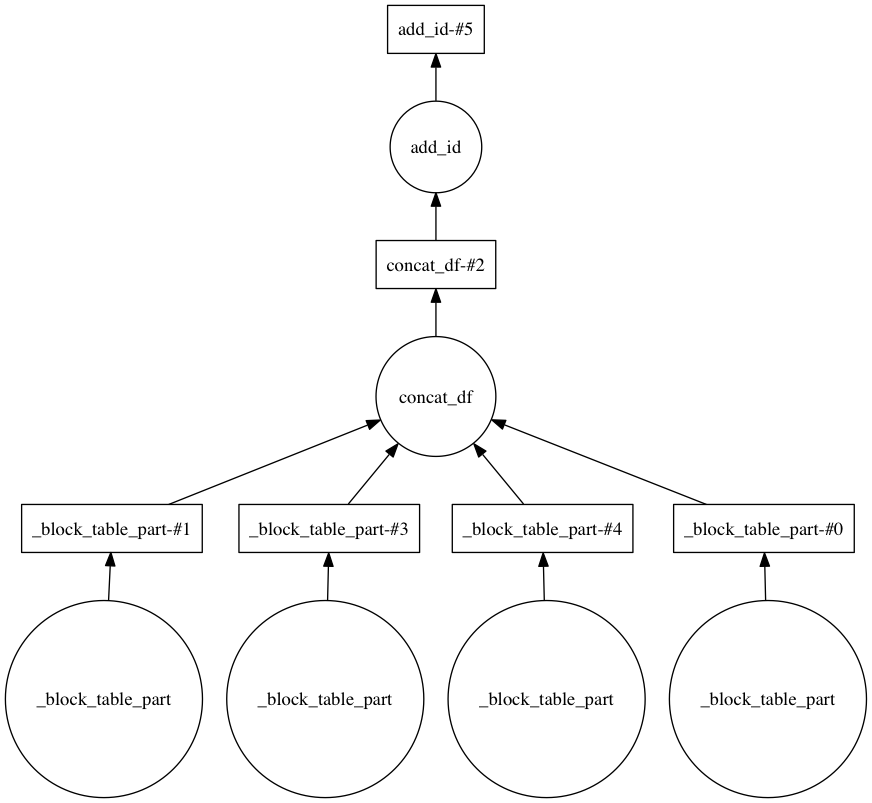

In [20]:
C.visualize()

In [22]:
from time import time
t = time()
x = 0
for i in range(100000):
    x = x+1
print(time()-t)


0.0357918739319


In [22]:
from time import time
t1 = time()
p = C.compute(get=client.get)
print(time()-t1)

2.10364699364


In [ ]:
# predictions.predicted.sum()